# Drzewa decyzyjne

In [10]:
import pandas as pd

Dysponujesz zbiorem danych dotyczących zdecydowania się klienta na lokatę (bank.csv). <br>
Czas kontaktu wyrażono w sekundach. Zmienna Lokata (1 – nie, 2 – tak)<br>
Dane pochodzą ze zbioru bank-marketing [S. Moro, R. Laureano, P. Cortez, 2011].<br>
Ze względu na niezrównoważenie klas zdecydodwano się na usunięcie części obserwacji większościowych. <br>

In [19]:
# Pobranie danych z pliku csv
# uwaga! plik się zaimportuje po podaniu jego nazwy, jeśli będzie umieszczony w katalogu domyślnym
deposit = pd.read_csv('bank.csv', sep=";", decimal=",")
# alternatywnie należy podać SWOJĄ ścieżkę dostępu (używając w niej slash, czyli /), jak w przykładzie poniżej
#course = pd.read_csv('C:\Users\karol\Downloads\banki.csv', sep=";", decimal=",")
#ścieżka to folder karol!!!
deposit.head()

,Wiek,CzasKontaktu,Kontakty,Lokata
0,36,19,11,1
1,38,225,1,1
2,50,209,0,1
3,23,56,0,1
4,29,296,0,1


In [22]:
# Informacje o ramce - jakiego typu mamy zmienne?
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Wiek          10578 non-null  int64
 1   CzasKontaktu  10578 non-null  int64
 2   Kontakty      10578 non-null  int64
 3   Lokata        10578 non-null  int64
dtypes: int64(4)
memory usage: 330.7 KB


In [23]:
#
# uzupełnij poniższy kod

# wszystkie zmienne z wyjątkiem Lokata
X = deposit.drop('Lokata', axis=1)
#usuwanie lokaty w kolumnach
# tylko zmienna Lokata
y = deposit['Lokata']

In [24]:
# sprawdź, co zawiera X, a co y posługując się metodą head
X.head()

,Wiek,CzasKontaktu,Kontakty
0,36,19,11
1,38,225,1
2,50,209,0
3,23,56,0
4,29,296,0


In [26]:
# podział - uzupełnij tak, by zbiór testowy obejmował 20%
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [30]:
# budowa modelu
# uzupełnij poniższy kod
from sklearn.tree import DecisionTreeClassifier
tree_res = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=123)
tree_res.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=123)

In [31]:
# predykcja dla zbioru testowego
# uzupełnij poniższy kod
y_pred = tree_res.predict(X_test)

In [33]:
# ocena na podstawie zbioru testowego - dokładność (sposób 1)
tree_res.score(X_test, y_test)

0.7301512287334594

In [35]:
# ocena na podstawie zbioru testowego - dokładność (sposób 2)
# alternatywa dla sposobu w komórce powyżej
# uzupełnij poniższy kod
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Dokładność wynosi', accuracy)

Dokładność wynosi 0.7301512287334594


In [38]:
# macierz pomyłek
# uzupełnij poniższy kod
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[639 423]
 [148 906]]


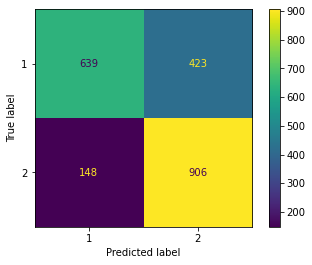

In [39]:
# macierz pomyłek - wizualizacja
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_res, X_test, y_test)

In [40]:
# miary jakości klasyfikacji
# uzupełnij poniższy kod
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.60      0.69      1062
           2       0.68      0.86      0.76      1054

    accuracy                           0.73      2116
   macro avg       0.75      0.73      0.73      2116
weighted avg       0.75      0.73      0.73      2116



[Text(418.5, 453.0, 'CzasKontaktu <= 249.5\ngini = 0.5\nsamples = 8462\nvalue = [4227, 4235]\nclass = tak'),
 Text(209.25, 271.8, 'Kontakty <= 0.5\ngini = 0.393\nsamples = 4078\nvalue = [2983, 1095]\nclass = nie'),
 Text(104.625, 90.59999999999997, 'gini = 0.303\nsamples = 3070\nvalue = [2498, 572]\nclass = nie'),
 Text(313.875, 90.59999999999997, 'gini = 0.499\nsamples = 1008\nvalue = [485, 523]\nclass = tak'),
 Text(627.75, 271.8, 'CzasKontaktu <= 469.5\ngini = 0.406\nsamples = 4384\nvalue = [1244, 3140]\nclass = tak'),
 Text(523.125, 90.59999999999997, 'gini = 0.488\nsamples = 2082\nvalue = [877, 1205]\nclass = tak'),
 Text(732.375, 90.59999999999997, 'gini = 0.268\nsamples = 2302\nvalue = [367, 1935]\nclass = tak')]

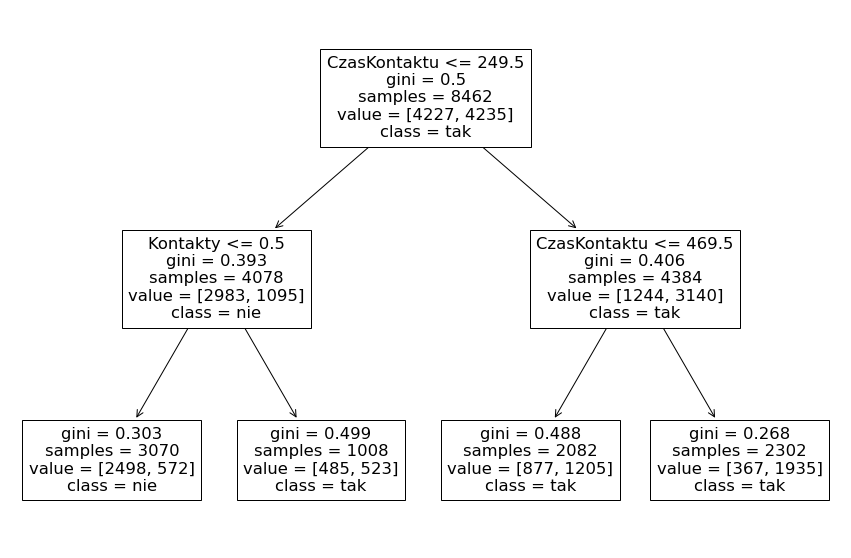

In [41]:
# 
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10] # ustawienie rozmiaru rysunku
tree.plot_tree(tree_res, 
               class_names=['nie','tak'],
               feature_names=X.columns) 

In [ ]:
# przewidywanie klasy nowej obserwacji
# uzupełnij poniższy kod
new_obs = [[45, 10, 0]]
tree_res.predict()

# a jaka będzie predykcja dla osoby w wieku 25 lat, z którą rozmowa trwała 420 sekund i wcześniej bank kontaktował
# się z nią 4 razy?

In [ ]:
# prawdopodobieństwo przynależności do klas dla nowej obserwacji
tree_res.predict_proba(new_obs)

**Zadanie** <br>
Wykonaj drzewo bez definiowania maksymalnej głębokości. Oceń czy to dobry pomysł.

In [ ]:
# strojenie parametru głębokość drzewa metodą przeszukiwania siatki
from sklearn.model_selection import 
my_search = GreedSearchCV(tree_res, 
                         param_grid={'max_depth':[3, 4]},
                         cv=5, 
                         scoring='accuracy')
my_search.fit(X_train,y_train)
my_search.best_params_

Jaka jest "najlepsza" głębokość określoną metodą przeszukiwania siatki?

**Zadanie** <br>
Wykonaj drzewo stosując "najlepszą" głębokość określoną metodą przeszukiwania siatki.

Warto przyjrzeć się poniższym wynikom...<br>
Przyjrzyj się i powiedz, w jakim celu została zbudowana poniższa pętla. Napisz w komentarzu, co liczy. <br>

In [ ]:
#
for i in range (2,6):
    tree_res2 = DecisionTreeClassifier(max_depth=i)
    tree_res2.fit(X_train, y_train)
    y_pred = tree_res2.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    print('Głębokość:', i, 'Dokładność:', accuracy)